In [1]:
import librosa
audio_file_path='UrbanSound8K/dog_bark.wav'
librosa_audio_data,librosa_sample_rate=librosa.load(audio_file_path)

In [2]:
print(librosa_audio_data)

[ 0.0110248   0.00945064  0.00754601 ... -0.00037472 -0.00096037
 -0.00733592]


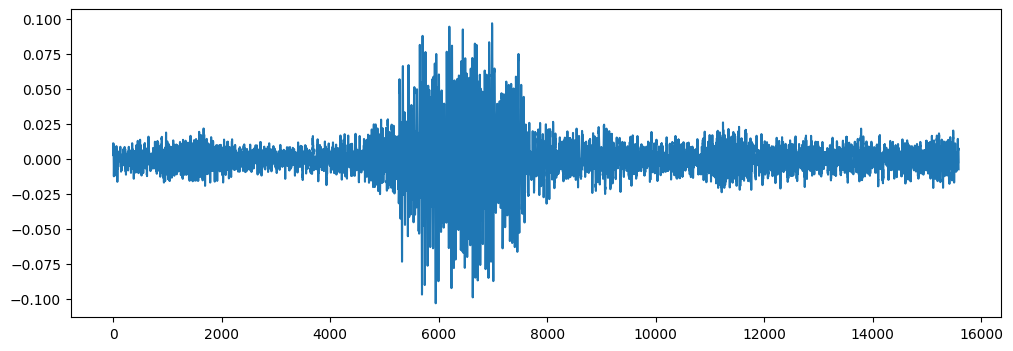

In [3]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.plot(librosa_audio_data)

In [4]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 31)


In [5]:
mfccs

array([[-3.5859186e+02, -3.2967868e+02, -3.3523245e+02, ...,
        -3.3245551e+02, -3.2713644e+02, -3.2973895e+02],
       [ 7.5410294e+01,  6.8765823e+01,  6.5418793e+01, ...,
         6.8189201e+01,  6.8473572e+01,  7.2061142e+01],
       [-1.0425219e+01, -1.0648245e+01, -1.0637106e+01, ...,
         7.9863129e+00,  1.2639107e+00, -2.8975022e+00],
       ...,
       [-1.2771623e+00,  1.7906355e+00,  4.6053920e+00, ...,
        -5.2767301e+00, -4.0208735e+00, -1.3109925e-01],
       [-5.6009979e+00, -6.3342390e+00, -4.8128576e+00, ...,
        -3.1762977e+00, -1.5143290e+00,  2.1247079e+00],
       [ 5.5461426e+00,  5.4206400e+00,  8.4508407e-01, ...,
         3.6362951e+00,  2.8716526e+00,  6.5186729e+00]], dtype=float32)

In [6]:
import pandas as pd
import os
import librosa
import numpy as np
from tqdm import tqdm

audio_dataset_path = 'UrbanSound8K/audio'
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')


In [7]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [8]:
extracted_features = []

for index_num, row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path), 'fold' + str(row["fold"]), str(row["slice_file_name"]))
    final_class_labels = row["class"]
    data = features_extractor(file_name)
    extracted_features.append([data, final_class_labels])

3554it [03:52, 14.57it/s]C:\Users\shweta budhiraja\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1323
  warnings.warn(
8325it [08:47, 21.02it/s]C:\Users\shweta budhiraja\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1103
  warnings.warn(
C:\Users\shweta budhiraja\AppData\Local\Programs\Python\Python311\Lib\site-packages\librosa\core\spectrum.py:257: UserWarning: n_fft=2048 is too large for input signal of length=1523
  warnings.warn(
8732it [09:10, 15.85it/s]


In [9]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-217.35526, 70.22339, -130.38527, -53.282898,...",dog_bark
1,"[-424.09818, 109.34077, -52.919525, 60.86475, ...",children_playing
2,"[-458.79114, 121.38419, -46.520657, 52.00812, ...",children_playing
3,"[-413.89984, 101.66373, -35.42945, 53.036354, ...",children_playing
4,"[-446.60352, 113.68541, -52.402218, 60.302044,...",children_playing


In [10]:
X=np.array(extracted_features_df['feature'].tolist())
y=np.array(extracted_features_df['class'].tolist())

In [11]:
X.shape

(8732, 40)

In [12]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [13]:
from tensorflow.keras.utils import to_categorical
y_onehot = y
print(y_onehot)

['dog_bark' 'children_playing' 'children_playing' ... 'car_horn'
 'car_horn' 'car_horn']


In [14]:
y.shape

(8732,)

In [15]:
y

array(['dog_bark', 'children_playing', 'children_playing', ...,
       'car_horn', 'car_horn', 'car_horn'], dtype='<U16')

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [17]:
X_train

array([[-1.3110471e+02,  1.1250591e+02, -2.2574696e+01, ...,
         3.2466526e+00, -1.3690238e+00,  2.7557547e+00],
       [-1.3670342e+01,  9.1085083e+01, -7.7927332e+00, ...,
        -3.2530503e+00, -5.2774529e+00, -1.5569714e+00],
       [-4.9871544e+01,  2.6535317e-01, -2.0500937e+01, ...,
         2.8545945e+00, -1.6092044e+00,  3.5248058e+00],
       ...,
       [-4.2701236e+02,  9.2623047e+01,  3.1293981e+00, ...,
         7.4264121e-01,  7.3349077e-01,  7.1100897e-01],
       [-1.4575461e+02,  1.3626578e+02, -3.3515522e+01, ...,
         1.4681193e+00, -2.0091701e+00, -8.8218188e-01],
       [-4.2103134e+02,  2.1065454e+02,  3.4906609e+00, ...,
        -5.3888674e+00, -3.3713605e+00, -1.5665118e+00]], dtype=float32)

In [18]:
X_test

array([[-2.67613708e+02,  1.03736465e+02,  1.76864700e+01, ...,
        -1.67063689e+00, -5.25388181e-01, -3.24234271e+00],
       [-4.66179565e+02,  1.09502459e+00, -3.40138893e+01, ...,
         1.77000160e+01,  1.38474627e+01, -5.18628263e+00],
       [-9.33917236e+01,  4.38009377e+01, -4.23669548e+01, ...,
         4.27829695e+00, -6.79035842e-01, -1.84728265e+00],
       ...,
       [-1.28723007e+02,  1.39382263e+02, -3.37595558e+01, ...,
        -9.42206955e+00,  4.83702612e+00,  1.19141665e+01],
       [-2.05466263e+02,  9.81175690e+01, -2.96137104e+01, ...,
        -3.55392367e-01,  1.11790216e+00,  5.29678762e-01],
       [-2.87615234e+02,  1.50856705e+02,  6.29480028e+00, ...,
        -2.78350562e-01, -2.11643720e+00, -1.58730888e+00]], dtype=float32)

In [19]:
y_train

array(['jackhammer', 'engine_idling', 'drilling', ..., 'dog_bark',
       'air_conditioner', 'siren'], dtype='<U16')

In [20]:
import tensorflow as tf
print(tf.__version__)

2.14.0


In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
import numpy as np
from datetime import datetime

In [22]:
num_labels = np.unique(y).shape[0]
print("Number of unique classes:", num_labels)
input_shape = (X_train.shape[1],)

Number of unique classes: 10


In [23]:
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

y_train_categorical = to_categorical(y_train_encoded, num_classes=num_classes)
y_test_categorical = to_categorical(y_test_encoded, num_classes=num_classes)

model = Sequential([
    Dense(100, input_shape=input_shape),
    Activation('relu'),
    Dropout(0.5),
    Dense(200),
    Activation('relu'),
    Dropout(0.5),
    Dense(100),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax') 
])

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', verbose=1, save_best_only=True)

num_epochs = 100
num_batch_size = 32
start = datetime.now()
model.fit(X_train, y_train_categorical, batch_size=num_batch_size, epochs=num_epochs, 
          validation_data=(X_test, y_test_categorical), callbacks=[checkpointer], verbose=1)
duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
203/219 [==========================>...] - ETA: 0s - loss: 10.2336 - accuracy: 0.1216
Epoch 1: val_loss improved from inf to 2.28570, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 3s 7ms/step - loss: 9.7335 - accuracy: 0.1214 - val_loss: 2.2857 - val_accuracy: 0.1093
Epoch 2/100
 14/219 [>.............................] - ETA: 0s - loss: 2.7723 - accuracy: 0.1384

C:\Users\shweta budhiraja\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


205/219 [===========================>..] - ETA: 0s - loss: 2.5938 - accuracy: 0.1212
Epoch 2: val_loss improved from 2.28570 to 2.28029, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.5821 - accuracy: 0.1208 - val_loss: 2.2803 - val_accuracy: 0.1139
Epoch 3/100
215/219 [============================>.] - ETA: 0s - loss: 2.3381 - accuracy: 0.1221
Epoch 3: val_loss improved from 2.28029 to 2.26683, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.3383 - accuracy: 0.1220 - val_loss: 2.2668 - val_accuracy: 0.1231
Epoch 4/100
206/219 [===========================>..] - ETA: 0s - loss: 2.2747 - accuracy: 0.1396
Epoch 4: val_loss improved from 2.26683 to 2.17106, saving model to saved_models\audio_classification.hdf5
219/219 [==============================] - 1s 5ms/step - loss: 2.2725 - accuracy: 0.1406 - val_loss: 2.1711 - val_accuracy: 0.1752
Epoch 5

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [25]:
X_test[1]


array([-466.17957   ,    1.0950246 ,  -34.01389   ,   35.33935   ,
        -14.88148   ,  -19.12843   ,   -0.5816844 ,  -16.130579  ,
        -21.339075  ,    7.6736345 ,  -29.16449   ,  -18.950253  ,
         -2.957999  ,   -8.16233   ,  -15.153101  ,   -6.604805  ,
         -7.5685973 ,    9.340646  ,   14.4331    ,   21.934181  ,
         20.861397  ,    1.3340123 ,  -19.228804  ,   -4.6302314 ,
         -1.0564744 ,    3.2152667 ,   -6.9842806 ,  -16.414577  ,
        -10.0286455 ,   13.0099535 ,    0.53346086,  -23.84339   ,
        -15.267321  ,    9.245735  ,   10.367627  ,   -0.5832011 ,
         -1.2624053 ,   17.700016  ,   13.847463  ,   -5.1862826 ],
      dtype=float32)

In [26]:
raw_predictions = model.predict(X_test)
predicted_classes = np.argmax(raw_predictions, axis=1)


55/55 [==============================] - 0s 2ms/step


In [29]:
from sklearn.preprocessing import LabelEncoder
filename = "UrbanSound8K/dog_bark.wav"
audio, sample_rate = librosa.load(filename, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
mfccs_scaled_features = mfccs_scaled_features.reshape(1,-1)

predicted_probabilities = model.predict(mfccs_scaled_features)
predicted_label = np.argmax(predicted_probabilities)

labelencoder = LabelEncoder()  
labelencoder.fit(y_train)  

prediction_class = labelencoder.inverse_transform([predicted_label])
print(prediction_class)


1/1 [==============================] - 0s 92ms/step
['dog_bark']
